## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1          X2        X3        X4           Y
0  84.609315  571.640657  0.198715  5.941628  141.465326
1  26.519770  986.231311  0.912565  8.354529  900.525212
2  24.220649  633.070435  0.278065  9.691424  177.494835
3  77.048895  607.478346  0.379589  9.722287  243.075585
4  99.316213  539.147421  0.418572  6.601051  246.630527


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9611678	total: 67.7ms	remaining: 1m 7s
1:	learn: 0.9512349	total: 68.2ms	remaining: 34s
2:	learn: 0.9411899	total: 68.8ms	remaining: 22.9s
3:	learn: 0.9300578	total: 69.4ms	remaining: 17.3s
4:	learn: 0.9176444	total: 69.9ms	remaining: 13.9s
5:	learn: 0.9067583	total: 70.5ms	remaining: 11.7s
6:	learn: 0.8956442	total: 71ms	remaining: 10.1s
7:	learn: 0.8845792	total: 71.6ms	remaining: 8.88s
8:	learn: 0.8722534	total: 72ms	remaining: 7.93s
9:	learn: 0.8603896	total: 72.5ms	remaining: 7.18s
10:	learn: 0.8507568	total: 72.9ms	remaining: 6.56s
11:	learn: 0.8365185	total: 73.4ms	remaining: 6.04s
12:	learn: 0.8254320	total: 73.9ms	remaining: 5.61s
13:	learn: 0.8130735	total: 74.4ms	remaining: 5.24s
14:	learn: 0.8021649	total: 74.9ms	remaining: 4.92s
15:	learn: 0.7932567	total: 75.3ms	remaining: 4.63s
16:	learn: 0.7821678	total: 75.7ms	remaining: 4.38s
17:	learn: 0.7712355	total: 76ms	remaining: 4.15s
18:	learn: 0.7639160	total: 76.5ms	remaining: 3.95s


93:	learn: 0.3101719	total: 108ms	remaining: 1.04s
94:	learn: 0.3064485	total: 109ms	remaining: 1.03s
95:	learn: 0.3033558	total: 109ms	remaining: 1.02s
96:	learn: 0.2998226	total: 109ms	remaining: 1.02s
97:	learn: 0.2966590	total: 110ms	remaining: 1.01s
98:	learn: 0.2924249	total: 110ms	remaining: 1s
99:	learn: 0.2889793	total: 110ms	remaining: 994ms
100:	learn: 0.2855845	total: 111ms	remaining: 986ms
101:	learn: 0.2825738	total: 111ms	remaining: 979ms
102:	learn: 0.2795679	total: 112ms	remaining: 974ms
103:	learn: 0.2766354	total: 112ms	remaining: 967ms
104:	learn: 0.2733246	total: 113ms	remaining: 961ms
105:	learn: 0.2707377	total: 113ms	remaining: 955ms
106:	learn: 0.2676652	total: 114ms	remaining: 948ms
107:	learn: 0.2644742	total: 114ms	remaining: 943ms
108:	learn: 0.2621473	total: 114ms	remaining: 936ms
109:	learn: 0.2589866	total: 115ms	remaining: 930ms
110:	learn: 0.2561550	total: 115ms	remaining: 925ms
111:	learn: 0.2527763	total: 116ms	remaining: 919ms
112:	learn: 0.2504898	

268:	learn: 0.0612331	total: 187ms	remaining: 507ms
269:	learn: 0.0608230	total: 187ms	remaining: 506ms
270:	learn: 0.0603315	total: 188ms	remaining: 505ms
271:	learn: 0.0598833	total: 188ms	remaining: 503ms
272:	learn: 0.0594593	total: 188ms	remaining: 502ms
273:	learn: 0.0590627	total: 189ms	remaining: 501ms
274:	learn: 0.0586468	total: 189ms	remaining: 499ms
275:	learn: 0.0582370	total: 190ms	remaining: 498ms
276:	learn: 0.0578199	total: 190ms	remaining: 496ms
277:	learn: 0.0575569	total: 190ms	remaining: 495ms
278:	learn: 0.0571614	total: 191ms	remaining: 493ms
279:	learn: 0.0567801	total: 191ms	remaining: 492ms
280:	learn: 0.0563777	total: 192ms	remaining: 490ms
281:	learn: 0.0560026	total: 192ms	remaining: 489ms
282:	learn: 0.0556147	total: 193ms	remaining: 488ms
283:	learn: 0.0551948	total: 193ms	remaining: 486ms
284:	learn: 0.0548924	total: 193ms	remaining: 485ms
285:	learn: 0.0546054	total: 194ms	remaining: 484ms
286:	learn: 0.0543093	total: 194ms	remaining: 482ms
287:	learn: 

512:	learn: 0.0171573	total: 290ms	remaining: 275ms
513:	learn: 0.0171063	total: 291ms	remaining: 275ms
514:	learn: 0.0170275	total: 291ms	remaining: 274ms
515:	learn: 0.0169779	total: 291ms	remaining: 273ms
516:	learn: 0.0168798	total: 292ms	remaining: 273ms
517:	learn: 0.0167709	total: 292ms	remaining: 272ms
518:	learn: 0.0167209	total: 293ms	remaining: 271ms
519:	learn: 0.0166162	total: 293ms	remaining: 270ms
520:	learn: 0.0165135	total: 293ms	remaining: 270ms
521:	learn: 0.0164098	total: 294ms	remaining: 269ms
522:	learn: 0.0163545	total: 294ms	remaining: 268ms
523:	learn: 0.0162547	total: 295ms	remaining: 268ms
524:	learn: 0.0161568	total: 295ms	remaining: 267ms
525:	learn: 0.0160574	total: 296ms	remaining: 266ms
526:	learn: 0.0159608	total: 296ms	remaining: 266ms
527:	learn: 0.0159121	total: 297ms	remaining: 265ms
528:	learn: 0.0158393	total: 297ms	remaining: 264ms
529:	learn: 0.0157915	total: 297ms	remaining: 264ms
530:	learn: 0.0156977	total: 298ms	remaining: 263ms
531:	learn: 

694:	learn: 0.0086744	total: 368ms	remaining: 162ms
695:	learn: 0.0086548	total: 369ms	remaining: 161ms
696:	learn: 0.0086361	total: 369ms	remaining: 161ms
697:	learn: 0.0085922	total: 370ms	remaining: 160ms
698:	learn: 0.0085683	total: 370ms	remaining: 159ms
699:	learn: 0.0085491	total: 371ms	remaining: 159ms
700:	learn: 0.0084899	total: 371ms	remaining: 158ms
701:	learn: 0.0084458	total: 371ms	remaining: 158ms
702:	learn: 0.0084166	total: 372ms	remaining: 157ms
703:	learn: 0.0084001	total: 372ms	remaining: 157ms
704:	learn: 0.0083819	total: 373ms	remaining: 156ms
705:	learn: 0.0083387	total: 373ms	remaining: 155ms
706:	learn: 0.0083119	total: 373ms	remaining: 155ms
707:	learn: 0.0082960	total: 374ms	remaining: 154ms
708:	learn: 0.0082777	total: 374ms	remaining: 154ms
709:	learn: 0.0082494	total: 375ms	remaining: 153ms
710:	learn: 0.0082351	total: 375ms	remaining: 152ms
711:	learn: 0.0082172	total: 375ms	remaining: 152ms
712:	learn: 0.0081753	total: 376ms	remaining: 151ms
713:	learn: 

935:	learn: 0.0042950	total: 472ms	remaining: 32.3ms
936:	learn: 0.0042884	total: 472ms	remaining: 31.8ms
937:	learn: 0.0042819	total: 473ms	remaining: 31.2ms
938:	learn: 0.0042720	total: 473ms	remaining: 30.7ms
939:	learn: 0.0042655	total: 474ms	remaining: 30.2ms
940:	learn: 0.0042550	total: 474ms	remaining: 29.7ms
941:	learn: 0.0042461	total: 474ms	remaining: 29.2ms
942:	learn: 0.0042376	total: 475ms	remaining: 28.7ms
943:	learn: 0.0042280	total: 475ms	remaining: 28.2ms
944:	learn: 0.0042192	total: 476ms	remaining: 27.7ms
945:	learn: 0.0042098	total: 476ms	remaining: 27.2ms
946:	learn: 0.0042012	total: 476ms	remaining: 26.7ms
947:	learn: 0.0041911	total: 477ms	remaining: 26.1ms
948:	learn: 0.0041826	total: 477ms	remaining: 25.6ms
949:	learn: 0.0041741	total: 477ms	remaining: 25.1ms
950:	learn: 0.0041652	total: 478ms	remaining: 24.6ms
951:	learn: 0.0041528	total: 478ms	remaining: 24.1ms
952:	learn: 0.0041406	total: 478ms	remaining: 23.6ms
953:	learn: 0.0041323	total: 479ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

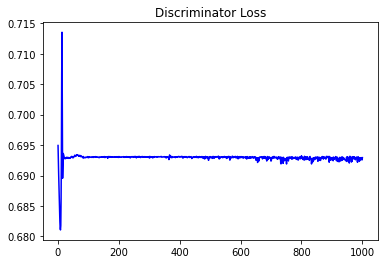

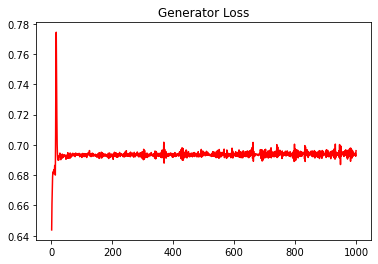

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.020996031634878225


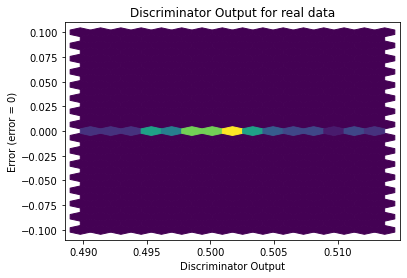

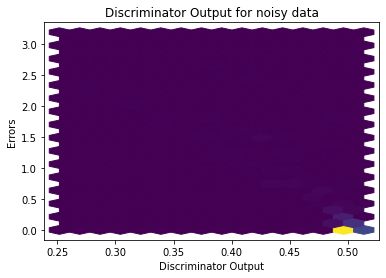

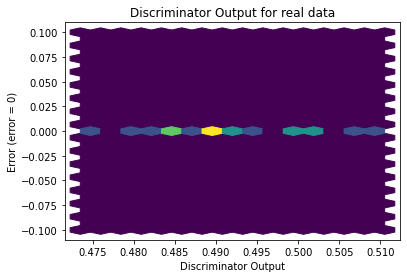

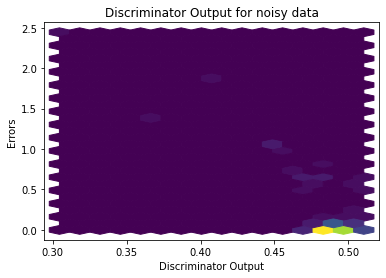

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


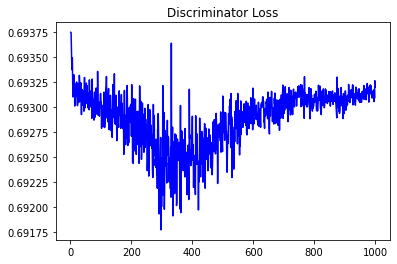

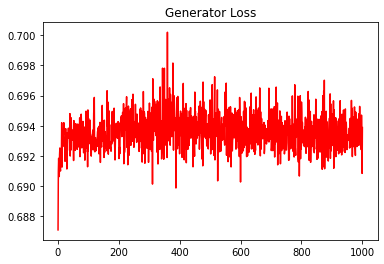

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.010716427166650127


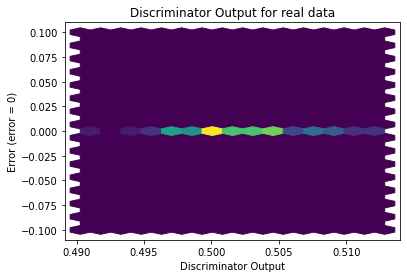

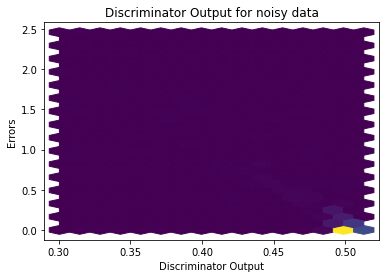

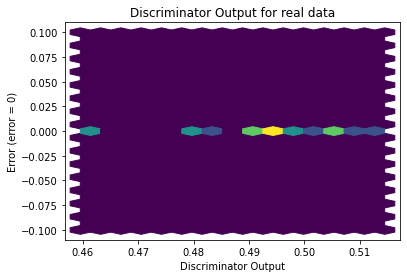

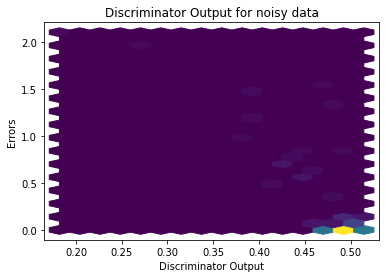

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1384]], requires_grad=True)
